The notebook intends to analyse over ten thousand apps from Google Play Store apps to devise pricing strategies.

The data consists of two files:

**Play Store Data.csv:** contains all the details of the applications on Google Play. There are 13 features that describe a given app.

**user_reviews.csv:** contains 100 reviews for each app. The ranking is based on the contribution to the sentiment analysis.

The text in each review has been pre-processed and attributed with three new features:
Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

**Steps:**




1.   Importing libraries
2.   load the Data
3.   Description of Data
4.   Cleaning the Data
5.   Top 10 Highest rating Apps in google play store in terms of categories
6.   Number of Application in terms of Category
7.   Top 10 apps which has more downloads
8.   Which 10 apps from the 'FAMILY' category are having the lowest rating and highest rating.
9.   Free and Paid Apps
10.  Relation between app category and app price
11.  Sentiment analysis of user reviews


#**Importing the libraries**#

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#**Load the play store data**#


In [2]:
df = pd.read_csv('/content/Play Store Data.csv')

ad=pd.read_csv('/content/Play Store Data.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#**Load the user review data**#

In [3]:
df2= pd.read_csv('/content/User Reviews.csv')

df2

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


#**Descripton of Data1**#

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
df.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [7]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


#**Description of data 2**#

In [9]:
#df2.info()

In [10]:
#df2.describe()

In [11]:
#df2.head()

In [12]:
#df2.tail()

#**Cleaning the Data Frame**#
**CONVERT TO NUMERAL DATA**





In [13]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [14]:
df['Reviews'] = pd.to_numeric(df['Reviews'],errors='coerce')

errors=’coerce’. It will replace all non-numeric values with NaN.

**Fix the Size**

In [15]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [16]:
def fix_size(s):
  try:
    if s.endswith('M'):
      return float(s[:-1])
    elif s.endswith('k'):
      return (float(s[:-1]) / 1024)
    elif s == '1,000+':
      return 1.0
    else:
      return np.nan
  except:
      return np.nan

**Demo**

In [17]:
fix_size('98M')

98.0

1 mb =1024kb

In [18]:
fix_size('45k')

0.0439453125

In [19]:
fix_size('demo')

nan

**fix the  all elements in Size columns**

In [20]:
df['Size']= df['Size'].apply(fix_size)

In [21]:
df['Size'].unique()

array([1.90000000e+01, 1.40000000e+01, 8.70000000e+00, 2.50000000e+01,
       2.80000000e+00, 5.60000000e+00, 2.90000000e+01, 3.30000000e+01,
       3.10000000e+00, 2.80000000e+01, 1.20000000e+01, 2.00000000e+01,
       2.10000000e+01, 3.70000000e+01, 2.70000000e+00, 5.50000000e+00,
       1.70000000e+01, 3.90000000e+01, 3.10000000e+01, 4.20000000e+00,
       7.00000000e+00, 2.30000000e+01, 6.00000000e+00, 6.10000000e+00,
       4.60000000e+00, 9.20000000e+00, 5.20000000e+00, 1.10000000e+01,
       2.40000000e+01,            nan, 9.40000000e+00, 1.50000000e+01,
       1.00000000e+01, 1.20000000e+00, 2.60000000e+01, 8.00000000e+00,
       7.90000000e+00, 5.60000000e+01, 5.70000000e+01, 3.50000000e+01,
       5.40000000e+01, 1.96289062e-01, 3.60000000e+00, 5.70000000e+00,
       8.60000000e+00, 2.40000000e+00, 2.70000000e+01, 2.50000000e+00,
       1.60000000e+01, 3.40000000e+00, 8.90000000e+00, 3.90000000e+00,
       2.90000000e+00, 3.80000000e+01, 3.20000000e+01, 5.40000000e+00,
      

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


In [23]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [24]:
def fix_Price(A):
  try:
    if A.startswith('$'):
      return float(A[1:])
    else:
      return 0.0
  except:
    return np.nan

In [25]:
df['Price']=ad['Price']

In [26]:
fix_Price('$4.99')

4.99

In [27]:
df['Price']=df['Price'].apply(fix_Price)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.1+ MB


In [29]:
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [30]:
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [31]:
fx = df[df['Rating']>5].index
fx


Index([10472], dtype='int64')

In [32]:
df.drop(fx,axis =0,inplace =True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.2+ MB


In [34]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [35]:
def lower_category(B):
  return B.title()

In [36]:
lower_category('AUTO_AND_VEHICLES')


'Auto_And_Vehicles'

In [37]:
df['Category'] =df['Category'].apply(lower_category)


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.2+ MB


In [39]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [40]:
df['Installs'] = df.Installs.str.replace(",","")
df['Installs'] = df.Installs.str.replace("+","")
df['Installs'] = df['Installs'].astype(float)
df['Installs'].dtype

dtype('float64')

In [41]:
df['Installs'].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.2+ MB


In [43]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [44]:
def correction(y):
  try:
    if y == 'Varies with device':
      return np.nan
    elif y == '4.4W and up':
      return y.replace('W','')
    else:
      return y
  except:
      return y

In [45]:
df['Android Ver'] = df['Android Ver'].apply(correction)

In [46]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up', nan,
       '2.2 and up', '5.0 and up', '6.0 and up', '1.6 and up',
       '1.5 and up', '2.1 and up', '7.0 and up', '5.1 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '7.1 and up', '7.0 - 7.1.1', '8.0 and up', '5.0 - 8.0',
       '3.1 and up', '2.0.1 and up', '4.1 - 7.1.1', '5.0 - 6.0',
       '1.0 and up', '2.2 - 7.1.1', '5.0 - 7.1.1'], dtype=object)

#**Top 10 Highest rating Apps in google play store in terms of categories**#

In [47]:
cp=df.sort_values(['Rating'],ascending=False)
Highest_Rating_App= cp.loc[:,['App','Category','Rating']]
Highest_Rating_App.head(11)

,App,Category,Rating
10776,Monster Ride Pro,Game,5.0
615,Awake Dating,Dating,5.0
612,American Girls Mobile Numbers,Dating,5.0
654,Speeding Joyride & Car Meet App,Dating,5.0
10820,Fr. Daoud Lamei,Family,5.0
10529,FK CLASSIC FOR YOU,Business,5.0
10416,FH School,Family,5.0
10407,Jigsaw Volvo FH 16 Trucks,Family,5.0
10357,Ríos de Fe,Lifestyle,5.0
1547,Eternal life,Libraries_And_Demo,5.0


#**Number of Application in terms of Category**#

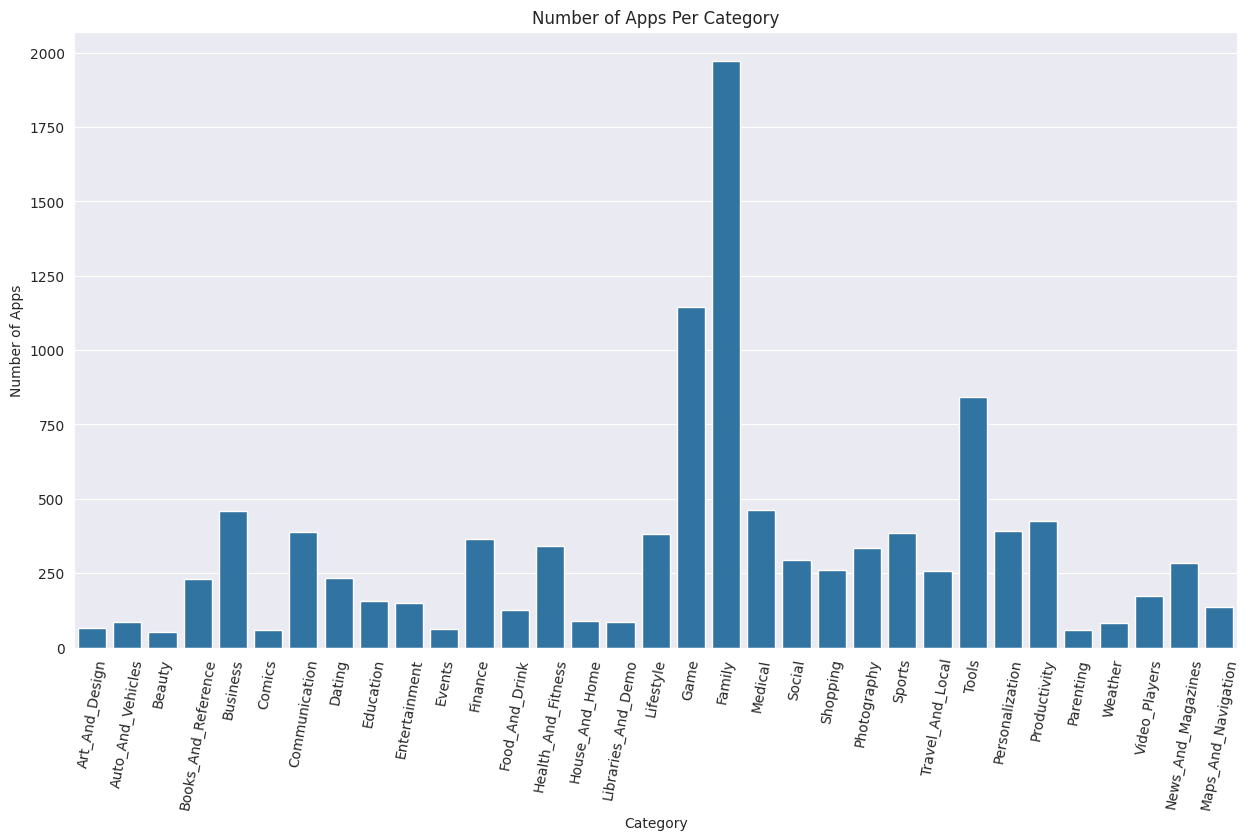

In [48]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 8))
sns.countplot(x='Category', data=df)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=80)
plt.ylabel('Number of Apps')
plt.show()

#**Top 10 apps which  has more downloads**#

In [49]:
bm = df.sort_values('Installs',ascending=False)
More_downloads_App= bm.loc[:,['App','Installs']]
More_downloads_App.head(11)

,App,Installs
2808,Google Photos,1.000000e+09
2853,Google Photos,1.000000e+09
3223,Maps - Navigate & Explore,1.000000e+09
3117,Maps - Navigate & Explore,1.000000e+09
3234,Google,1.000000e+09
3232,Google Street View,1.000000e+09
3127,Google Street View,1.000000e+09
2554,Google+,1.000000e+09
464,Hangouts,1.000000e+09
468,Skype - free IM & video calls,1.000000e+09


#**Which 10 apps from the 'FAMILY' category are having the lowest rating and highest rating**#

**lowest rating**

In [50]:
ab = df[df['Category'] == 'Family']
bv = ab.sort_values(by=['Rating'], ascending=True)

Family_lowest_rating= bv.loc[:,['Category','Rating']]
Family_lowest_rating.head(11)


,Category,Rating
5978,Family,1.0
10324,Family,1.0
4127,Family,1.0
4905,Family,1.6
6135,Family,1.7
9176,Family,1.7
4904,Family,1.8
6812,Family,1.8
7416,Family,1.9
6532,Family,1.9


**Highest rating**

In [51]:
hi = df[df['Category'] == 'Family']
hig = hi.sort_values(by=['Rating'], ascending=False)

Family_highest_rating = hig.loc[:,['Category','Rating']]
Family_highest_rating.head(11)

,Category,Rating
10407,Family,5.0
10416,Family,5.0
10629,Family,5.0
6861,Family,5.0
5450,Family,5.0
7239,Family,5.0
6726,Family,5.0
6783,Family,5.0
6816,Family,5.0
9503,Family,5.0


#**FREE AND PAID APPS**#

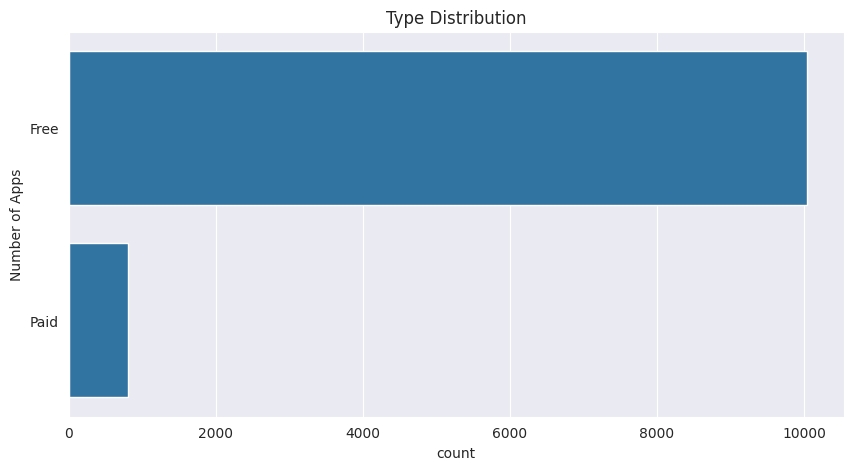

In [52]:
plt.figure(figsize=(10, 5))
sns.countplot(df['Type'])
plt.title('Type Distribution')
plt.ylabel('Number of Apps')
plt.show()

#**Relation between app category and app price**#

Text(0.5, 1.0, 'App pricing trend across categories')

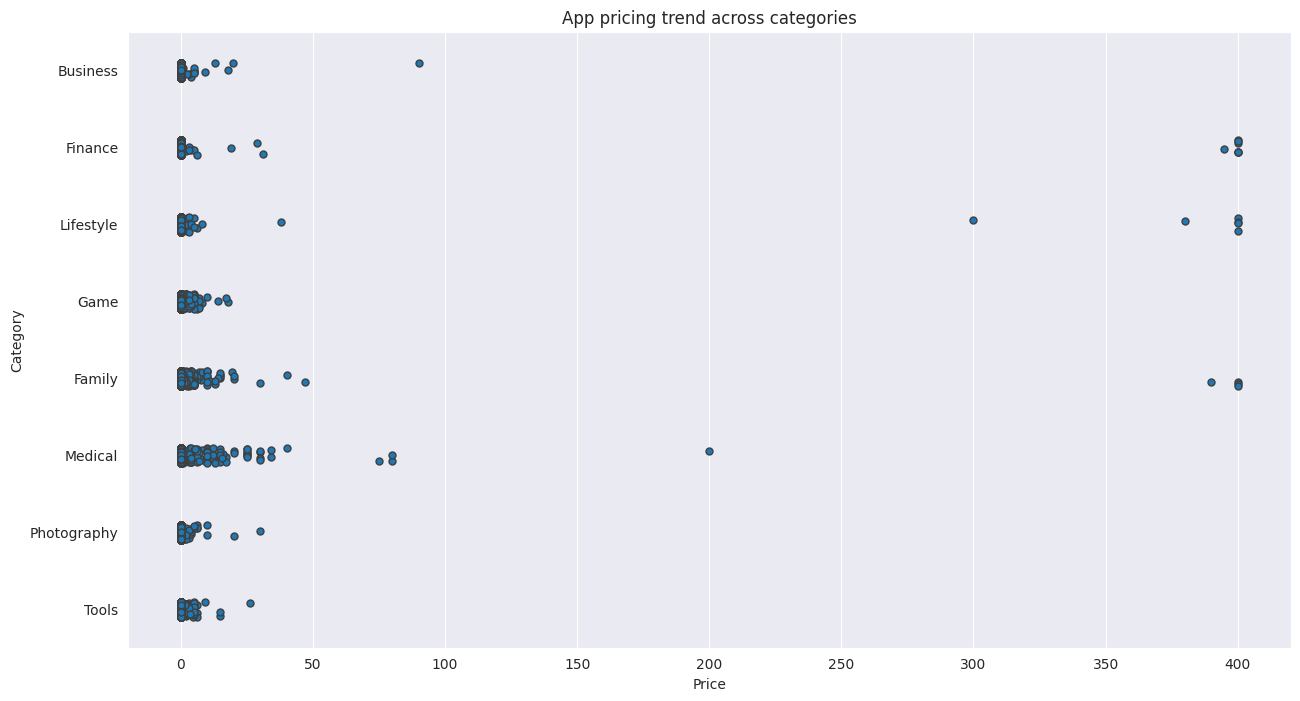

In [53]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

popular_app_cats = df[df.Category.isin(['Game', 'Family', 'Photography',
                                            'Medical', 'Tools', 'Finance',
                                            'Lifestyle','Business'])]

ax = sns.stripplot(x = popular_app_cats["Price"], y = popular_app_cats["Category"], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

#**Sentiment analysis of user reviews**#

In [54]:
merged_df = pd.merge(df, df2, on = "App")
merged_df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,Art_And_Design,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,Art_And_Design,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,Art_And_Design,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000


Text(0.5, 1.0, 'Sentiment Polarity Distribution')

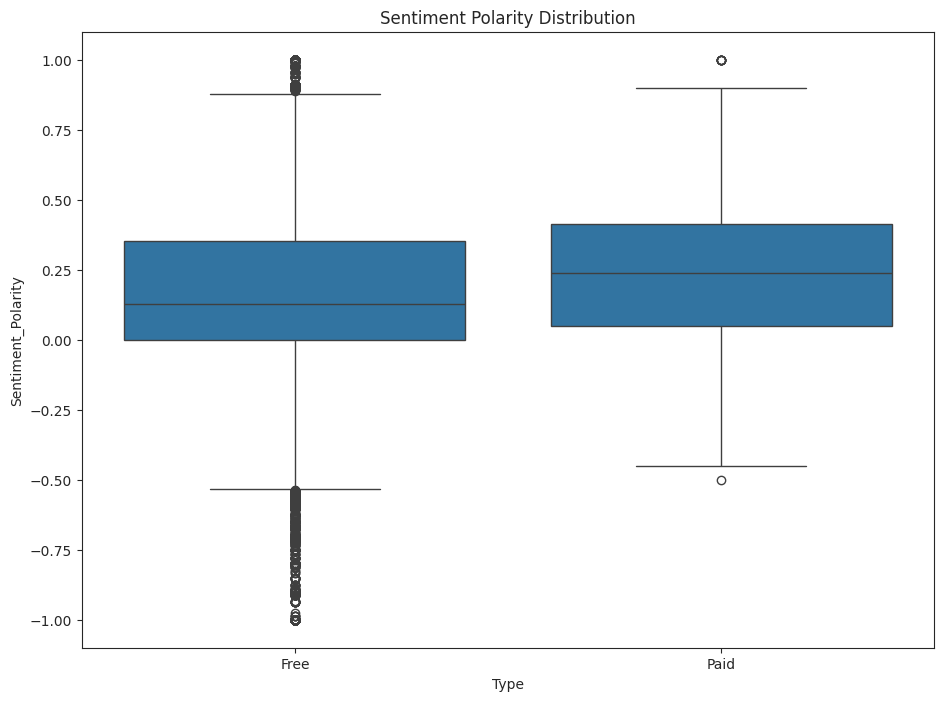

In [55]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)


ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')


#**Training and Testing of Model**#

Regression

In [56]:
#Defining model columns
X=df[['Reviews', 'Size', 'Installs', 'Price']]
y=df['Rating']

In [57]:

# Impute missing values with the mean of each column
X = X.fillna(X.mean())  # Or use other imputation strategies like median or using SimpleImputer
y=y.fillna(y.mean())

#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#Training the algorithm
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [58]:
#Making predictions
y_pred_linear = reg.predict(X_test)

#Creating a DF comparing actual values vs predicted values
dfReg = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_linear})
dfReg

,Actual,Predicted
6371,4.500000,4.161752
6247,3.400000,4.164698
2081,4.800000,4.248784
8210,4.191757,4.159100
6754,3.900000,4.157490
...,...,...
1380,4.500000,4.238508
2330,4.700000,4.177322
1132,4.200000,4.187845
1910,4.600000,4.261975


In [59]:
#Mean Absolute Error
print('Mean Absolute Error',metrics.mean_absolute_error(y_test, y_pred_linear))

#Mean Squared Error
print('Mean Squared Error',metrics.mean_squared_error(y_test, y_pred_linear))

#Root Mean Squared Error
rmse_linear=metrics.mean_squared_error(y_test, y_pred_linear)
print('Root Mean Squared Error',rmse_linear)

Mean Absolute Error 0.3129557520453886
Mean Squared Error 0.2283735163766879
Root Mean Squared Error 0.2283735163766879


In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error # Import mean_squared_error

regressor = DecisionTreeRegressor(
    max_depth=5,  # Maximum depth of the tree (optional)
    min_samples_split=2,  # Minimum number of samples required to split a node (optional)
    min_samples_leaf=1,  # Minimum number of samples required at a leaf node (optional)

)

# 4. Train the model
regressor.fit(X_train, y_train)

# 5. Make predictions
y_pred_tree = regressor.predict(X_test)

# 6. Evaluate the model
#Mean Absolute Error
print('Mean Absolute Error',metrics.mean_absolute_error(y_test, y_pred_tree))

#Mean Squared Error
print('Mean Squared Error',metrics.mean_squared_error(y_test, y_pred_tree))

#Root Mean Squared Error
rmse_tree=metrics.mean_squared_error(y_test, y_pred_tree)
print('Root Mean Squared Error',rmse_tree)


Mean Absolute Error 0.2971849497730709
Mean Squared Error 0.20565513614822445
Root Mean Squared Error 0.20565513614822445


In [61]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score # Import necessary metrics

# 1. Create an SVR regressor
regressor = SVR(  kernel='rbf',  # Choose a kernel (e.g., 'rbf', 'linear', 'poly')
    C=1.0,          # Regularization parameter (optional)

)

# 2. Train the model
regressor.fit(X_train, y_train)

# 3. Make predictions
y_pred_svm = regressor.predict(X_test)

# 4. Evaluate the model
#Mean Absolute Error
print('Mean Absolute Error',metrics.mean_absolute_error(y_test, y_pred_svm))

#Mean Squared Error
print('Mean Squared Error',metrics.mean_squared_error(y_test, y_pred_svm))

#Root Mean Squared Error
rmse_svm=metrics.mean_squared_error(y_test, y_pred_svm)
print('Root Mean Squared Error',rmse_svm)

#Accuracy Score
svr_r2=metrics.r2_score(y_test, y_pred_svm)
print('SVM_Accuracy: ', svr_r2)

Mean Absolute Error 0.31243367498319413
Mean Squared Error 0.23734248101342295
Root Mean Squared Error 0.23734248101342295
SVM_Accuracy:  -0.029642364996679937


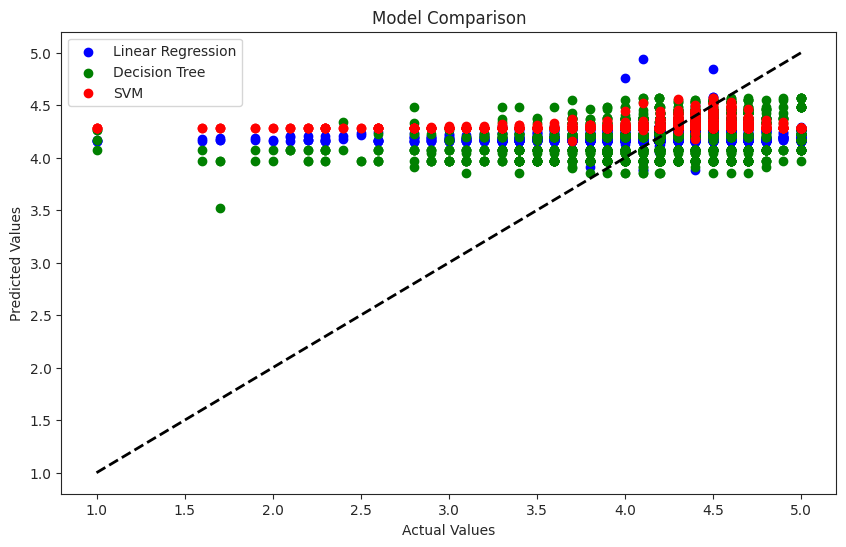

In [62]:
# Plotting the comparison
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_tree, color='green', label='Decision Tree')
plt.scatter(y_test, y_pred_svm, color='red', label='SVM')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model Comparison')
plt.legend()
plt.show()

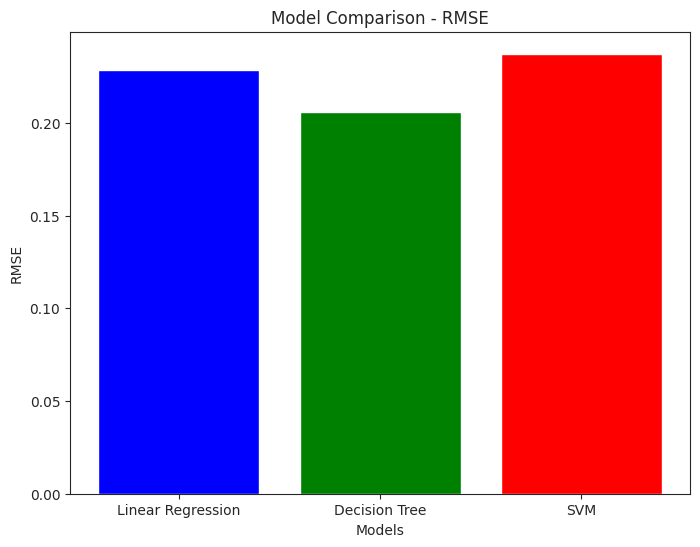

In [63]:
# Create bar graph
models = ['Linear Regression', 'Decision Tree', 'SVM']
rmse_values = [rmse_linear, rmse_tree, rmse_svm]

plt.figure(figsize=(8, 6))
plt.bar(models, rmse_values, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Model Comparison - RMSE')
plt.show()

Classification


In [64]:
catgry=pd.get_dummies(df['Category'],prefix='catg',drop_first=True)
typ=pd.get_dummies(df['Type'],prefix='typ',drop_first=True)
cr=pd.get_dummies(df['Content Rating'],prefix='cr',drop_first=True)
frames=[df,catgry,typ,cr]
df=pd.concat(frames,axis=1)
df.drop(['Category','Installs','Type','Content Rating'],axis=1,inplace=True)

In [65]:
df.drop(['App','Size','Price','Genres','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)
df.head(4)

,Rating,Reviews,catg_Auto_And_Vehicles,catg_Beauty,catg_Books_And_Reference,catg_Business,catg_Comics,catg_Communication,catg_Dating,catg_Education,...,catg_Tools,catg_Travel_And_Local,catg_Video_Players,catg_Weather,typ_Paid,cr_Everyone,cr_Everyone 10+,cr_Mature 17+,cr_Teen,cr_Unrated
0,4.1,159.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,3.9,967.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,4.7,87510.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,4.5,215644.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [66]:
X=df.drop('Rating',axis=1)
y=df['Rating'].values
y=y.astype('int')

<ipython-input-66-7f050bea4e41>:3: RuntimeWarning: invalid value encountered in cast
  y=y.astype('int')


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [68]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [69]:
#LogisticRegression
lr_c=LogisticRegression(random_state=0)

lr_c.fit(X_train,y_train)

lr_pred=lr_c.predict(X_test)

lr_cm=classification_report(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)

print('LogisticRegression_accuracy:',lr_ac)
print('Classification Report:', lr_cm)

LogisticRegression_accuracy: 0.6406826568265682
Classification Report:                       precision    recall  f1-score   support

-9223372036854775808       0.67      0.01      0.01       309
                   1       0.00      0.00      0.00        16
                   2       0.00      0.00      0.00        40
                   3       0.00      0.00      0.00       370
                   4       0.64      1.00      0.78      1389
                   5       0.00      0.00      0.00        44

            accuracy                           0.64      2168
           macro avg       0.22      0.17      0.13      2168
        weighted avg       0.51      0.64      0.50      2168



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [70]:
#K-Nearest Neighbors

knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Adjust n_neighbors (number of neighbors) as needed
knn_classifier.fit(X_train, y_train)

y_pred_knn = knn_classifier.predict(X_test)

knn_ac = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {knn_ac}")
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.6937269372693727
                      precision    recall  f1-score   support

-9223372036854775808       0.65      0.76      0.70       309
                   1       0.50      0.06      0.11        16
                   2       0.00      0.00      0.00        40
                   3       0.31      0.17      0.22       370
                   4       0.77      0.87      0.81      1389
                   5       0.17      0.09      0.12        44

            accuracy                           0.69      2168
           macro avg       0.40      0.32      0.33      2168
        weighted avg       0.64      0.69      0.66      2168



In [71]:
# DecisionTree Classifier
dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=0)

dtree_c.fit(X_train,y_train)

dtree_pred=dtree_c.predict(X_test)

dtree_cm=classification_report(y_test,dtree_pred)
dtree_ac=accuracy_score(y_test, dtree_pred)

print('Decision Tree_Accuracy',accuracy_score(dtree_pred,y_test))
print('Classification Report:', dtree_cm)

Decision Tree_Accuracy 0.6702029520295203
Classification Report:                       precision    recall  f1-score   support

-9223372036854775808       0.68      0.80      0.73       309
                   1       0.17      0.06      0.09        16
                   2       0.06      0.07      0.07        40
                   3       0.28      0.23      0.26       370
                   4       0.78      0.80      0.79      1389
                   5       0.14      0.07      0.09        44

            accuracy                           0.67      2168
           macro avg       0.35      0.34      0.34      2168
        weighted avg       0.65      0.67      0.66      2168



#**Model Comparison**#

Text(0.5, 1.0, 'Model Accuracy')

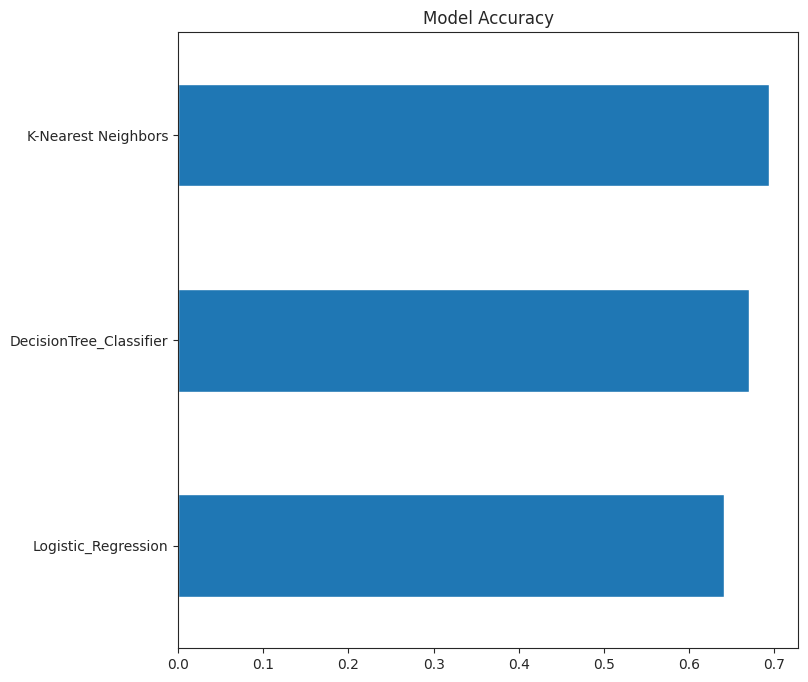

In [72]:
%matplotlib inline
model_accuracy = pd.Series(data=[lr_ac,dtree_ac,knn_ac],
        index=['Logistic_Regression','DecisionTree_Classifier','K-Nearest Neighbors'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accuracy')

#**Conclusion**#

After analyzing the dataset we have got answers to some of the serious & interesting facts which any of the android users would love to know.

a) Top 10 Highest rating Apps in google play store in terms of categories

b) Number of Application in terms of Category

c) Top 10 apps which has more downloads

d) Which 10 apps from the 'FAMILY' category are having the lowest rating and highest rating.

e) Free and Paid Apps

f) Relation between app category and app price


The Google Play Store Apps report provides some useful insights regarding the trending of the apps in the play store. As per the graphs visualizations shown above, most of the trending apps (in terms of users' installs) are from the categories like GAME, COMMUNICATION, and TOOL even though the amount of available apps from these categories are twice as much lesser than the category FAMILY. The trending of these apps are most probably due to their nature of being able to entertain or assist the user. Besides, it also shows a good trend where we can see that developers from these categories are focusing on the quality instead of the quantity of the apps.

Other than that, the charts shown above actually implies that most of the apps having good ratings of above 4.0 are mostly confirmed to have high amount of reviews and user installs. There are some spikes in term of size and price but it shouldn't reflect that apps with high rating are mostly big in size and pricy as by looking at the graphs they are most probably are due to some minority. Futhermore, most of the apps that are having high amount of reviews are from the categories of SOCIAL and GAME like Instagram, Clash of Clans etc.


